In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
accepted = pd.read_csv("../accepted_dropna.csv")
rejected = pd.read_csv("../rejected_dropna.csv")

### Loan Amount

In [3]:
# Run this cell to show mean, min, max, quantile, and std
loan_amount_summary = accepted['loan_amnt'].describe()
print(loan_amount_summary)

count    1.871838e+06
mean     1.541364e+04
std      9.336197e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.350000e+04
75%      2.002500e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64


### Title

In [4]:
# Run this cell to show mean, min, max, quantile, and std
title_summary = accepted['title'].describe()
print(title_summary)

count                1871838
unique                  1971
top       Debt consolidation
freq                 1057027
Name: title, dtype: object


['Debt consolidation', 'Credit card refinancing', 'Home improvement', 'Other', 'All Remaining']
[1057027, 431785, 124331, 115005, 143690]


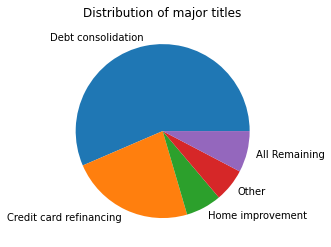

<Figure size 432x288 with 0 Axes>

In [5]:
## Run this cell to show the top 10 most popular titles
import heapq
rank = accepted['title'].value_counts().sort_values()
title_to_account = dict(rank) # a python dict mapping title to its count
top_titles = heapq.nlargest(4, title_to_account, key=title_to_account.get)
top_counts = list(map(lambda title : title_to_account[title], top_titles))

# Append the "others" category
others_count = len(accepted) - sum(top_counts)
top_titles.append('All Remaining')
top_counts.append(others_count)

# Print info
print(top_titles)
print(top_counts)

# Generate graph
plt.title("Distribution of major titles")
plt.pie(top_counts, labels=top_titles)
plt.show()
plt.savefig("raw_dist_by_title.png")

### Debt to Income Ratio (dti)

In [6]:
# Run this cell to show mean, min, max, quantile, and std
dti_summary = accepted['dti'].describe()
print(dti_summary)

count    1.871838e+06
mean     1.884405e+01
std      1.220732e+01
min     -1.000000e+00
25%      1.200000e+01
50%      1.794000e+01
75%      2.465000e+01
max      9.990000e+02
Name: dti, dtype: float64


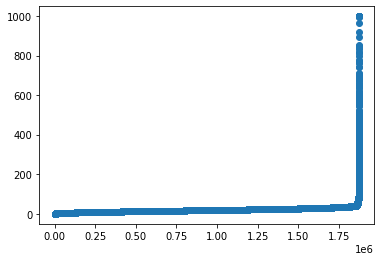

In [7]:
# Run this cell to visualize the dti
dti_array = list(accepted['dti'])
dti_array.sort()
n = len(dti_array)
plt.scatter([i for i in range(n)], dti_array)


### States

In [8]:
## Run this cell to display numerical states_summary
states_summary = accepted['addr_state'].describe()
print(states_summary)
state_to_count = dict(accepted['addr_state'].value_counts())
print(state_to_count)

count     1871838
unique         51
top            CA
freq       256826
Name: addr_state, dtype: object
{'CA': 256826, 'TX': 158071, 'NY': 152958, 'FL': 131870, 'IL': 76406, 'NJ': 68888, 'PA': 63699, 'OH': 62086, 'GA': 61429, 'VA': 52100, 'NC': 51371, 'MI': 47743, 'MD': 45263, 'AZ': 44057, 'MA': 43313, 'CO': 40705, 'WA': 38571, 'MN': 33669, 'IN': 32380, 'TN': 30516, 'CT': 29953, 'MO': 29692, 'NV': 26194, 'WI': 24999, 'SC': 22734, 'AL': 22090, 'OR': 21569, 'LA': 21297, 'KY': 18005, 'OK': 17185, 'KS': 15778, 'AR': 13736, 'UT': 12413, 'MS': 11370, 'NM': 9675, 'NH': 9409, 'HI': 8812, 'RI': 8391, 'NE': 7280, 'WV': 6507, 'DE': 5319, 'MT': 5167, 'ME': 4473, 'DC': 4347, 'AK': 4309, 'VT': 4245, 'WY': 3941, 'SD': 3819, 'ID': 3810, 'ND': 3397, 'IA': 1}


count     1871838
unique         51
top            CA
freq       256826
Name: addr_state, dtype: object


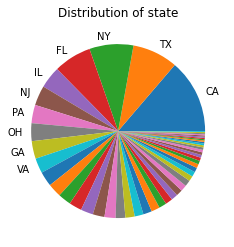

<Figure size 432x288 with 0 Axes>

In [9]:
## Run this cell generate pie chart
states_summary = accepted['addr_state'].describe()
print(states_summary)
state_to_count = dict(accepted['addr_state'].value_counts())

# All the labels
states = list(state_to_count.keys())
state_labels = states[:10] + [''] * (51-10) # 
quantities_by_state = list(map(lambda state : state_to_count[state], states))

# Plot
plt.title("Distribution of state")
plt.pie(quantities_by_state, labels=state_labels) 
plt.show()
plt.savefig("./images/raw_dist_by_state.png")


### Month

In [10]:
# Run this cell to unify the dates
def unifyDate(accepted_dropna, rejected_dropna):
    monthNameToInt = {
        "Jan": 1,
        "Feb": 2,
        "Mar": 3,
        "Apr": 4,
        "May": 5,
        "Jun": 6,
        "Jul": 7,
        "Aug": 8,
        "Sep": 9,
        "Oct": 10,
        "Nov": 11,
        "Dec": 12
    }
    
    ## Proccess accepted
    # filter to keep the 2016 year
    accepted_dropna = accepted_dropna[accepted_dropna['issue_d'].str.endswith('2016')]
    accepted_dropna['month'] = accepted_dropna['issue_d'].str[0:3].map(monthNameToInt)
    del accepted_dropna['issue_d']

    ## Process rejected
    rejected_dropna['month'] = rejected_dropna['Application_Date'].str[5:7].astype(int)
    del rejected_dropna['Application_Date']
    
    ## Final
    return (accepted_dropna, rejected_dropna)

accepted_copy = accepted.copy()
rejected_copy = rejected.copy()
accepted_unified, rejected_unified = unifyDate(accepted, rejected)

/var/folders/bh/b7l9xs7133g2k2ztkrf8jywr0000gn/T/ipykernel_58919/2751175451.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_dropna['month'] = accepted_dropna['issue_d'].str[0:3].map(monthNameToInt)


In [11]:
# Run this cell to show info distribution by month (after date unifying)
accepted_unified_summary = accepted_unified['month'].describe()
print(accepted_unified_summary)

month_to_count = dict(accepted_unified['month'].value_counts())
print(month_to_count)

count    386223.000000
mean          6.344938
std           3.497630
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: month, dtype: float64
{3: 53635, 2: 33874, 12: 33490, 11: 32369, 8: 32082, 4: 31269, 7: 31243, 10: 30803, 6: 29420, 1: 28065, 9: 25264, 5: 24709}


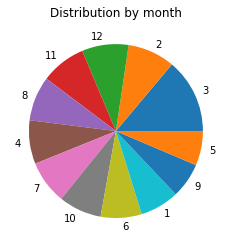

In [12]:
# Run this cell to generate graph about distribution by month (after date unifying)
months = list(month_to_count.keys())
quantities_by_month = list(map(lambda m : month_to_count[m], months))

# Plot
plt.title("Distribution by month")
plt.pie(quantities_by_month, labels=months)
plt.show()

### Policy Code


In [13]:
# Run this cell to display numerical policy_code states_summary
policy_code_summary = accepted['policy_code'].describe()
print(policy_code_summary)
policy_code_to_count = dict(accepted['policy_code'].value_counts())
print(policy_code_to_count)

count    1871838.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: policy_code, dtype: float64
{1.0: 1871838}


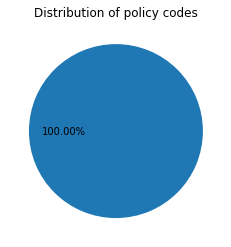

In [14]:
# Run this cell to generate the graph
plt.title("Distribution of policy codes")
plt.pie([1], autopct = "%0.2f%%")
plt.show()

### Visualize Pearson Correlation

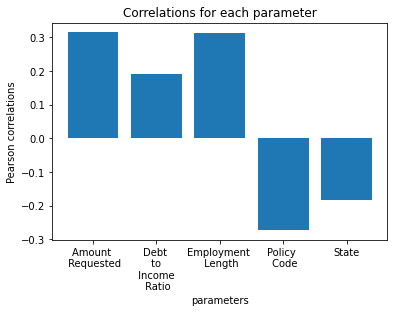

In [11]:
labels = ["Amount \n Requested", "Debt \n to \n Income \n Ratio", "Employment \n Length", "Policy \n Code", "State"]
heights = [0.314855950557641, 0.19107061252524427, 0.31328120214582894, -0.2726458010016944, -0.18370957322852507]

plt.title("Correlations for each parameter")
plt.xlabel('parameters')
plt.ylabel('Pearson correlations')
plt.bar(labels, heights, width=0.8)
plt.show()
